In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow import keras

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
fashion_data = keras.datasets.fashion_mnist.load_data()
fashion_data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_data

In [ ]:
item_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Reshape the date
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train.shape
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#normalize the data
x_train_norm = x_train/225
x_test_norm = x_test/225

In [ ]:
# Date splitting for training, testing and validation
x_val, x_train_n = x_train_norm[:5000], x_train_norm[5000:]
y_val, y_train_n = y_train[:5000], y_train[5000:]
x_test_n = x_test_norm

In [ ]:
# Random Seed
tf.random.set_seed(42)

# Model Architecture
model = keras.models.Sequential()

# Building a Model
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))

model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

Epoch 1/5
860/860 [==============================] - 10s 7ms/step - loss: 0.8259 - accuracy: 0.7166 - val_loss: 0.7559 - val_accuracy: 0.7250
Epoch 2/5
860/860 [==============================] - 6s 7ms/step - loss: 0.5309 - accuracy: 0.8069 - val_loss: 0.4829 - val_accuracy: 0.8176
Epoch 3/5
860/860 [==============================] - 6s 7ms/step - loss: 0.4706 - accuracy: 0.8306 - val_loss: 0.9629 - val_accuracy: 0.6952
Epoch 4/5
860/860 [==============================] - 4s 4ms/step - loss: 0.4335 - accuracy: 0.8449 - val_loss: 0.3989 - val_accuracy: 0.8614
Epoch 5/5
860/860 [==============================] - 4s 4ms/step - loss: 0.4076 - accuracy: 0.8543 - val_loss: 0.4075 - val_accuracy: 0.8536


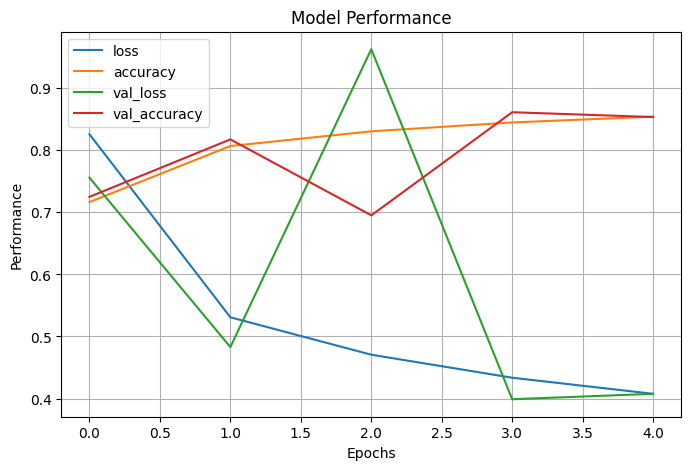

In [ ]:
# Copiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Fitting Values to Model
model_fit = model.fit(x_train_n, y_train_n, epochs=5, batch_size=64, validation_data=(x_val, y_val))

# Model Performance Visualization
pd.DataFrame(model_fit.history).plot(figsize=(8, 5))
plt.title('Model Performance')
plt.xlabel("Epochs")
plt.ylabel('Performance')
plt.grid(True)
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.8423

 Model Evaluaton Score :  [0.4413078725337982, 0.8422999978065491]
313/313 [==============================] - 1s 2ms/step

 y_pred output :  [9 2 1 ... 8 1 5]

 Predicted Class :  [9 2 1]

 Predicted Class in Labels :  ['Ankle boot' 'Pullover' 'Trouser']

 Confusion Matrix :  [[728   6  12 108  31   0  96   0  19   0]
 [  0 969   0  22   7   0   0   0   2   0]
 [  7   2 537  15 362   1  63   0  13   0]
 [  8  26   4 865  67   0  25   0   5   0]
 [  0   1  16  22 932   0  23   0   6   0]
 [  1   0   0   1   0 850   0  75   9  64]
 [118   3  51  89 338   0 369   0  32   0]
 [  0   0   0   0   0   9   0 939   1  51]
 [  1   1   2   8  10   1   7   6 964   0]
 [  0   0   0   0   0   3   0  35   1 961]]

 Accuracy Score :  0.8114


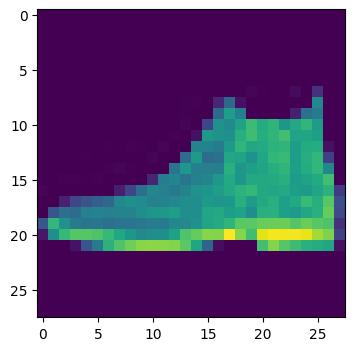

In [ ]:
# Model Evaluation
score = model.evaluate(x_test_n, y_test)
print('\n Model Evaluaton Score : ', score)

# Prediction & class Object
y_pred = np.argmax(model.predict(x_test), axis=-1)
print('\n y_pred output : ', y_pred)

# Class & Lables of initial 3 data
print('\n Predicted Class : ',y_pred[:3])
print('\n Predicted Class in Labels : ', np.array(item_names)[y_pred[:3]])

# Predicted Output Visualization
plt.figure(figsize=(6, 4))
plt.imshow(x_test[0].reshape((28, 28)))

# Performance Metrics
# Confusion Matrix
print('\n Confusion Matrix : ', confusion_matrix(y_test, y_pred))

# Accuracy Score
print('\n Accuracy Score : ', accuracy_score(y_test, y_pred))